In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
def split(df,label):
    X_tr, X_te, Y_tr, Y_te = train_test_split(df, label, test_size=0.25, random_state=42)
    return X_tr, X_te, Y_tr, Y_te

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix 

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import KFold, cross_val_score
from time import perf_counter
from time import process_time
# Import functions created for this course
import timeit

'''classifiers = ['LinearSVM', 'RadialSVM', 
               'Logistic',  'RandomForest', 
               'AdaBoost',  'DecisionTree', 
               'KNeighbors','GradientBoosting']'''
classifiers = ['Logistic']

models = [#svm.SVC(kernel='linear'),
          #svm.SVC(kernel='rbf'),
          #LogisticRegression(max_iter = 1000),
          RandomForestClassifier(n_jobs=4,random_state=2018,criterion='gini',n_estimators=100,verbose=False),
          #AdaBoostClassifier(random_state = 0),
          DecisionTreeClassifier(random_state=0),
          KNeighborsClassifier(n_neighbors =3),
          XGBClassifier(colsample_bytree= 1 , gamma = 1 , max_depth= 10, min_child_weight= 3, n_estimators=100, reg_alpha= 0, reg_lambda= 0, seed= 0),
          CatBoostClassifier(),
          #GradientBoostingClassifier(random_state=0)]
]


def acc_score(df,label):
    Score = pd.DataFrame({"Classifier":classifiers})
    j = 0
    acc = []
    bcc=[]
    ccc=[]
    dcc=[]
    X_train,X_test,Y_train,Y_test = split(df,label)
    for i in models:
        model = i
        start_time = timeit.default_timer()
        model.fit(X_train,Y_train)
        end_time = timeit.default_timer()
        elapsed_time = end_time - start_time
        print("Elapsed time : ",elapsed_time)
        predictions = model.predict(X_test)
        acc.append(accuracy_score(Y_test,predictions))
        bcc.append(precision_score(Y_test,predictions))
        ccc.append(precision_score(Y_test,predictions))
        dcc.append(precision_score(Y_test,predictions))
        j = j+1     
    Score["Accuracy"] = acc
    Score.sort_values(by="Accuracy", ascending=False,inplace = True)
    Score.reset_index(drop=True, inplace=True)
    Score["Precision"] = bcc
    Score.sort_values(by="Precision", ascending=False,inplace = True)
    Score.reset_index(drop=True, inplace=True)
    Score["recall_score"] = ccc
    Score.sort_values(by="recall_score", ascending=False,inplace = True)
    Score.reset_index(drop=True, inplace=True)
    Score["f1_score"] = dcc
    Score.sort_values(by="f1_score", ascending=False,inplace = True)
    Score.reset_index(drop=True, inplace=True)
    
    return Score

def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    pass

def plot(score,score1,score2,score3,x,y,c="b",d="x",a="a",b="c", marker = 'o'):
    gen = [1,2,3,4,5]
    plt.figure(figsize=(4,2))
    ax = sns.pointplot(x=gen, y=score,color = c , marker = 'o')
    ax.set(ylim=(x,y))
    ax.set(xlabel="Generation", ylabel="Score",title="logistic regression")
    ax = sns.pointplot(x=gen, y=score1,color = d, marker = 'o')
    ax.set(ylim=(x,y))
    ax.set(xlabel="Generation", ylabel="Score",title="logistic regression")
    ax.set(ylim=(x,y))
    ax = sns.pointplot(x=gen, y=score2,color = a , marker = 'o')
    ax = sns.pointplot(x=gen, y=score3,color = b , marker = 'o')
    ax.set(ylim=(x,y))
    ax.set(xlabel="Generation", ylabel="Score",title="logistic regression")
    #ax.set(xlabel="Generation", ylabel=d)
    #ax.set(ylim=(x,y))
    
    

In [2]:
df = pd.read_csv('/kaggle/input/credit-card-11/creditcard.csv') 
df


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
target = 'Class'

In [4]:
X = df.loc[:, df.columns!=target]
Y = df.loc[:, df.columns==target]


In [5]:
from sklearn.preprocessing import StandardScaler
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [6]:
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    pass
    
def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test,  y_pred_proba)
    auc = roc_auc_score(Y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

Class
0    284315
1       492
Name: count, dtype: int64


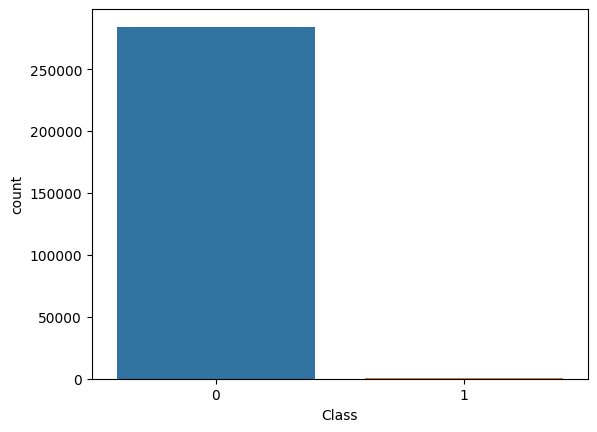

In [7]:
ax = sns.countplot(x=target, data=df)
print(df[target].value_counts())

In [8]:
Y_train[target].value_counts()

Class
0    227451
1       394
Name: count, dtype: int64

In [9]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# SMOTE

In [10]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12, sampling_strategy=1.0)
x_train_res, y_train_res = sm.fit_resample(X_train, Y_train)

In [11]:
unique, count = np.unique(y_train_res, return_counts=True)
y_train_smote_value_count = { k:v for (k,v) in zip(unique, count)}
y_train_smote_value_count

{0: 227451, 1: 227451}

In [12]:
X=x_train_res
Y=y_train_res
#X = StandardScaler().fit_transform(X)

In [13]:
def initilization_of_population(size,n_feat):
    population = []
    for i in range(size):
        chromosome = np.ones(n_feat,dtype=bool)     
        chromosome[:int(0.3*n_feat)]=False             
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population


def fitness_score(population,X_test,Y_test):
    scores = []
    p_s = []
    r_s=[]
    f1_s=[]
    i=1
    print(sx)
    tot_time=0
   
    for chromosome in population:
        start_time = timeit.default_timer()
        sx.fit(X_train.iloc[:,chromosome],Y_train)
        #x_test_prediction = sx.predict(X_test)
        #cf_matrix=confusion_matrix(x_test_prediction,Y_test)
        #print(cf_matrix)
        #sns.heatmap(cf_matrix, annot=True, cmap='Blues')
        end_time = timeit.default_timer()
        elapsed_time = end_time - start_time
        print("Elapsed time : ",elapsed_time)
        tot_time=tot_time+elapsed_time
        predictions = sx.predict(X_test.iloc[:,chromosome])
        cf_matrix=confusion_matrix(predictions,Y_test)
        sns.heatmap(cf_matrix, annot=True, cmap='Blues')
        scores.append(accuracy_score(Y_test,predictions))
        p_s.append(precision_score(Y_test,predictions))
        r_s.append(recall_score(Y_test,predictions))
        f1_s.append(f1_score(Y_test,predictions))
        i=i+1
    '''y_pred_proba_dt = sx.predict_proba(X_test)[:, 1]
    fpr_dt, tpr_dt, thresholds = roc_curve(Y_test,  y_pred_proba_dt)
    auc_dt = roc_auc_score(Y_test, y_pred_proba_dt)   
    plt.figure(figsize=(5, 5), dpi=100)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    plt.plot(fpr_dt,tpr_dt,linestyle='solid',label="Decisiontree ="+str(auc_dt))'''
    scores,p_s,r_s,f1_s, population = np.array(scores),np.array(p_s),np.array(r_s),np.array(f1_s), np.array(population)
    inds = np.argsort(scores)                                    
    return (list(scores[inds][::-1]), list(p_s[inds][::-1]),list(r_s[inds][::-1]),list(f1_s[inds][::-1]),list(population[inds,:][::-1]),tot_time )


def selection(pop_after_fit,n_parents):
    population_nextgen = []
    for i in range(n_parents):
        population_nextgen.append(pop_after_fit[i])
    return population_nextgen


def crossover(pop_after_sel):
    pop_nextgen = pop_after_sel
    for i in range(0,len(pop_after_sel),2):
        new_par = []
        child_1 , child_2 = pop_nextgen[i] , pop_nextgen[i+1]
        new_par = np.concatenate((child_1[:len(child_1)//2],child_2[len(child_1)//2:]))
        pop_nextgen.append(new_par)
    return pop_nextgen


def mutation(pop_after_cross,mutation_rate,n_feat):   
    mutation_range = int(mutation_rate*n_feat)
    pop_next_gen = []
    for n in range(0,len(pop_after_cross)):
        chromo = pop_after_cross[n]
        rand_posi = [] 
        for i in range(0,mutation_range):
            pos = randint(0,n_feat-1)
            rand_posi.append(pos)
        for j in rand_posi:
            chromo[j] = not chromo[j]  
        pop_next_gen.append(chromo)
    return pop_next_gen

def generations(sx,df,label,size,n_feat,n_parents,mutation_rate,n_gen,X_train,
                                   X_test, Y_train, Y_test):
    
    
    best_chromo= []
    best_score= []
    best_precission = []
    best_recall = []
    best_f1call = []
    total_time=[]
    population_nextgen=initilization_of_population(size,n_feat)
    for i in range(n_gen):
        
        scores,p_s,r_s,f1_s, pop_after_fit,time = fitness_score(population_nextgen,X_test,Y_test)
        print('Best score in generation',i+1,':',scores[:1])  #2

        pop_after_sel = selection(pop_after_fit,n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross,mutation_rate,n_feat)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
        best_precission.append(p_s[0])
        best_recall.append(r_s[0])
        best_f1call.append(f1_s[0])
        #total_time.append(tot_time)
        print('time',time)
    return (best_chromo,best_score,best_precission,best_recall,best_f1call)

In [14]:
'''parameters = {'criterion': ['entropy', 'gini'],
               'max_depth': list(np.linspace(10, 1200, 10, dtype = int)) + [None],
               'max_features': ['auto', 'sqrt','log2', None],
               'min_samples_leaf': [4, 12],
               'min_samples_split': [5, 10],
               'n_estimators': list(np.linspace(151, 1200, 10, dtype = int))}'''

"parameters = {'criterion': ['entropy', 'gini'],\n               'max_depth': list(np.linspace(10, 1200, 10, dtype = int)) + [None],\n               'max_features': ['auto', 'sqrt','log2', None],\n               'min_samples_leaf': [4, 12],\n               'min_samples_split': [5, 10],\n               'n_estimators': list(np.linspace(151, 1200, 10, dtype = int))}"

In [15]:
'''from tpot import TPOTClassifier
from deap.gp import Primitive


tpot_classifier = TPOTClassifier(generations= 5, population_size= 24, offspring_size= 12,
                                 verbosity= 2, early_stop= 12,
                                 config_dict={'sklearn.ensemble.RandomForestClassifier': parameters}, 
                                 cv = 4, scoring = 'accuracy')
tpot_classifier.fit(X_train,Y_train)'''

"from tpot import TPOTClassifier\nfrom deap.gp import Primitive\n\n\ntpot_classifier = TPOTClassifier(generations= 5, population_size= 24, offspring_size= 12,\n                                 verbosity= 2, early_stop= 12,\n                                 config_dict={'sklearn.ensemble.RandomForestClassifier': parameters}, \n                                 cv = 4, scoring = 'accuracy')\ntpot_classifier.fit(X_train,Y_train)"

In [16]:
#score1 = acc_score(X,Y) 
#score1

In [17]:
X.shape[1]

30

KNeighborsClassifier(n_neighbors=7)
Elapsed time :  0.07381898500000261
Elapsed time :  0.07025068000001511
Elapsed time :  0.07259010000001354
Elapsed time :  0.053113245000020015
Elapsed time :  0.0668929380000236
Elapsed time :  0.08014307000001963
Elapsed time :  0.05637994300002447
Elapsed time :  0.05453400999999758
Elapsed time :  0.05534838599999148
Elapsed time :  0.06946561000006568
Best score in generation 1 : [0.9995786664794073]
time 0.6525369670001737
KNeighborsClassifier(n_neighbors=7)
Elapsed time :  0.061477379999928417
Elapsed time :  0.07418135800003256
Elapsed time :  0.05794697000010274
Elapsed time :  0.06440210100004151
Elapsed time :  0.08285665300002165
Elapsed time :  0.05382252000003973
Elapsed time :  0.0472857089999934
Elapsed time :  0.04587870600005317
Elapsed time :  0.059421595000003435
Elapsed time :  0.06802453599993896
Elapsed time :  0.052864816999999675
Elapsed time :  0.0708317439999746
Elapsed time :  0.05754754999998113
Elapsed time :  0.0431184

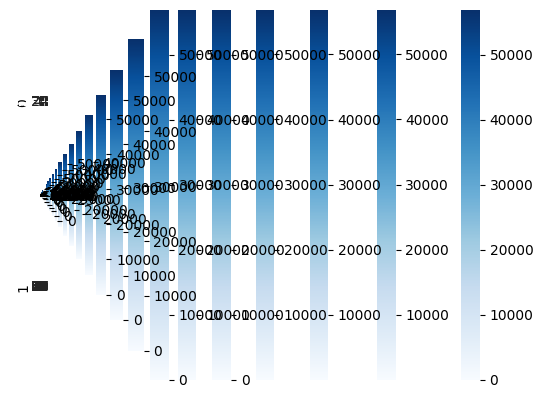

In [18]:
models = [#XGBClassifier(colsample_bytree= 1 , gamma = 1 , max_depth= 10, min_child_weight= 3, n_estimators=100, reg_alpha= 0, reg_lambda= 0, seed= 0),
          #CatBoostClassifier()
    #MLPClassifier(activation= 'tanh', alpha= 0.0001, hidden_layer_sizes= (10, 30, 10), learning_rate= 'adaptive', solver='adam'),
              #LogisticRegression(max_iter = 100),
          #DecisionTreeClassifier(criterion= 'entropy', max_depth= 10, min_samples_leaf= 7, min_samples_split= 3),
    KNeighborsClassifier(n_neighbors= 7,metric='minkowski'),
    #BernoulliNB(binarize=0.0)
          RandomForestClassifier(n_jobs=4,random_state=2018,criterion='gini',n_estimators=100,verbose=False)
             # MLPClassifier(hidden_layer_sizes=(200,), max_iter=10000),svm.SVC()
        ]
for sx in models:
   # X_train,X_test, Y_train, Y_test = split(X,Y)
    chromo_df_bc,score_bc,best_precission,best_recall,best_f1call=generations(sx,X,Y,size=10,n_feat=X.shape[1],n_parents=10,mutation_rate=0.20,n_gen=5,
                         X_train = X,X_test = X_test,Y_train = Y,Y_test = Y_test)
    
    
    print(score_bc)
    
    print(best_precission)
    
    print(best_recall)
    
    print(best_f1call)

In [19]:
plt.figure(figsize=(5, 5), dpi=100)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    plt.plot(fpr_dt,tpr_dt,linestyle='solid',label="Decisiontree ="+str(auc_dt))
    plt.plot(fpr_xb,tpr_xb,linestyle='dotted',label="XGBoost ="+str(auc_xb))
    plt.plot(fpr_rf,tpr_rf,linestyle='dashed',label="Randomforesttree ="+str(auc_rf))
    plt.plot(fpr_ann,tpr_ann,linestyle='-.',label="ANN ="+str(auc_ann))
    plt.plot(fpr_knn,tpr_knn,linestyle='dashdot',label="KNN ="+str(auc_knn))
    plt.plot(fpr_cb,tpr_cb,linestyle=':',label="CatBoost ="+str(auc_cb))
    plt.legend(loc=4)
    plt.show()

IndentationError: unexpected indent (779440893.py, line 2)

In [ ]:
performance_metric=['score_bc',"best_precission","best_recall","best_f1call"]
lr:
[0.9992977752242331, 0.9992764956855735, 0.9992658559162437, 0.9992871354549033, 0.9992764956855735]
[0.8738738738738738, 0.8715596330275229, 0.8636363636363636, 0.8867924528301887, 0.8785046728971962]
[0.6510067114093959, 0.6375838926174496, 0.6375838926174496, 0.6308724832214765, 0.6308724832214765]
[0.7461538461538462, 0.7364341085271318, 0.7335907335907336, 0.7372549019607842, 0.7343749999999999]
dt:
[0.9994908886626171, 0.9995435553526912, 0.9995962220427653, 0.9995786664794073, 0.9995259997893332]
[0.9156626506024096, 0.95, 0.9746835443037974, 0.9512195121951219, 0.961038961038961]
[0.7755102040816326, 0.7755102040816326, 0.7857142857142857, 0.7959183673469388, 0.7551020408163265]
[0.839779005524862, 0.8539325842696629, 0.8700564971751412, 0.8666666666666666, 0.8457142857142858]

knn:
[0.9994786513028397, 0.9995956887654676, 0.9995531296881484, 0.999521210380159, 0.9996382478427868]
[0.890625, 0.9302325581395349, 0.9421487603305785, 0.9193548387096774, 0.9752066115702479]
[0.7651006711409396, 0.8053691275167785, 0.7651006711409396, 0.7651006711409396, 0.7919463087248322]
[0.8231046931407943, 0.8633093525179855, 0.8444444444444444, 0.8351648351648351, 0.8740740740740741]
nb:
[0.9992020173002649, 0.9991488184536159, 0.9989785821443391, 0.9990637002989775, 0.9991381786842861]
[0.8135593220338984, 0.8, 0.7912087912087912, 0.7904761904761904, 0.7982456140350878]
[0.6442953020134228, 0.6174496644295302, 0.48322147651006714, 0.5570469798657718, 0.610738255033557]
[0.7191011235955057, 0.6969696969696969, 0.6, 0.6535433070866142, 0.6920152091254754]
rf:
[0.9995962220427653, 0.9996137776061234, 0.9996137776061234, 0.9996137776061234, 0.9996137776061234]
[0.9746835443037974, 0.9871794871794872, 0.975, 0.9871794871794872, 0.9871794871794872]
[0.7857142857142857, 0.7857142857142857, 0.7959183673469388, 0.7857142857142857, 0.7857142857142857]
[0.8700564971751412, 0.8750000000000001, 0.8764044943820225, 0.8750000000000001, 0.8750000000000001]

ann:
[0.9993153330290369, 0.999403110845827, 0.999420666409185, 0.9994733330992591, 0.9995435553526912]
[0.8105263157894737, 0.8809523809523809, 0.8350515463917526, 0.9146341463414634, 0.9186046511627907]
[0.7857142857142857, 0.7551020408163265, 0.826530612244898, 0.7653061224489796, 0.8061224489795918]
[0.7979274611398963, 0.8131868131868131, 0.8307692307692307, 0.8333333333333334, 0.858695652173913]

xgboost:
[0.9996137776061234, 0.9996137776061234, 0.9996137776061234, 0.9995962220427653, 0.9996313331694814]
[0.9871794871794872, 0.9523809523809523, 1.0, 0.9629629629629629, 1.0]
[0.7857142857142857, 0.8163265306122449, 0.7755102040816326, 0.7959183673469388, 0.7857142857142857]
[0.8750000000000001, 0.8791208791208791, 0.8735632183908045, 0.871508379888268, 0.88]

CatBoost
[0.9996488887328394, 0.9996488887328394, 0.9997015554229135, 0.9996488887328394, 0.9996313331694814]
[0.9875, 0.975609756097561, 1.0, 0.9875, 0.9873417721518988]
[0.8061224489795918, 0.8163265306122449, 0.826530612244898, 0.8061224489795918, 0.7959183673469388]
[0.8876404494382023, 0.888888888888889, 0.9050279329608939, 0.8876404494382023, 0.8813559322033897]


In [ ]:
xgboost:
[0.9995962220427653, 0.9996313331694814, 0.9996137776061234, 0.9996137776061234, 0.9995786664794073]
[0.987012987012987, 0.9873417721518988, 0.9871794871794872, 0.9871794871794872, 0.9512195121951219]
[0.7755102040816326, 0.7959183673469388, 0.7857142857142857, 0.7857142857142857, 0.7959183673469388]
[0.8685714285714285, 0.8813559322033897, 0.8750000000000001, 0.8750000000000001, 0.8666666666666666]
CatBoost
[0.9996488887328394, 0.9996488887328394, 0.9997015554229135, 0.9996488887328394, 0.9996313331694814]
[0.9875, 0.975609756097561, 1.0, 0.9875, 0.9873417721518988]
[0.8061224489795918, 0.8163265306122449, 0.826530612244898, 0.8061224489795918, 0.7959183673469388]
[0.8876404494382023, 0.888888888888889, 0.9050279329608939, 0.8876404494382023, 0.8813559322033897]



In [ ]:
sub=['1','2','3','4','5']
lr=[0.7461538461538462, 0.7364341085271318, 0.7335907335907336, 0.7372549019607842, 0.7343749999999999]
dt=[0.7755102040816326, 0.7755102040816326, 0.7857142857142857, 0.7959183673469388, 0.7551020408163265]
knn=[0.7651006711409396, 0.8053691275167785, 0.7651006711409396, 0.7651006711409396, 0.7919463087248322]
#nb=[0.9992020173002649, 0.9991488184536159, 0.9989785821443391, 0.9990637002989775, 0.9991381786842861]
rf=[0.7857142857142857, 0.7857142857142857, 0.7959183673469388, 0.7857142857142857, 0.7857142857142857]
ann=[0.7857142857142857, 0.7551020408163265, 0.826530612244898, 0.7653061224489796, 0.8061224489795918]
xgboost=[0.7857142857142857, 0.8163265306122449, 0.7755102040816326, 0.7959183673469388, 0.7857142857142857]


#catboost=[0.8876404494382023, 0.888888888888889, 0.9050279329608939, 0.8876404494382023, 0.8813559322033897]
#plt.plot(sub,lr,label='lr')
plt.plot(sub,dt,label='dt', marker = 'o')
plt.plot(sub,knn,label='knn', marker = 'o')
#plt.plot(sub,nb,label='nb')
plt.plot(sub,rf,label='rf',marker = 'o')
plt.plot(sub,ann,label='ann', marker = 'o')
plt.plot(sub,xgboost,label='xgboost', marker = 'o')
#plt.plot(sub,ann,label='catboost', marker = 'o')
plt.xlabel('Generation')
plt.ylabel('Recall')
plt.legend()
plt.show()

In [ ]:
score_bc=[0.9992977752242331, 0.9992764956855735, 0.9992658559162437, 0.9992871354549033, 0.9992764956855735]

In [ ]:
best_precission=[0.8429752066115702,
 0.8738738738738738,
 0.864406779661017,
 0.8727272727272727,
 0.8878504672897196]

In [ ]:
best_recall

In [ ]:
best_f1call

In [ ]:
plot(score_bc,best_precission,best_recall,best_f1call,0.6,1.0,c = "gold",d="blue",a="red",b="green")
#plot(best_precission,0.6,1.0,c = "b",d="Precision")
#plot(best_recall,0.6,1.0,c = "r",d="Recall")
#plot(best_f1call,0.6,1.0,c = "y",d="F1 Score")

In [ ]:
from sklearn import tree
classify_ = tree.DecisionTreeClassifier()
X_train,X_test, Y_train, Y_test = split(X,Y)
chromo_df_bc,score_bc,best_precission,best_recall,best_f1call=generations(X,Y,size=80,n_feat=X.shape[1],n_parents=64,mutation_rate=0.20,n_gen=5,
                         X_train = X_train,X_test = X_test,Y_train = Y_train,Y_test = Y_test)


In [ ]:
score_bc

In [ ]:
best_precission

In [ ]:
best_recall

In [ ]:
best_f1call

In [ ]:
plot(score_bc,0.9,1.0,c = "gold")

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
model = KNeighborsClassifier(n_neighbors =3)

In [ ]:
X_train,X_test, Y_train, Y_test = split(X,Y)
chromo_df_bc,score_bc,best_precission,best_recall,best_f1call=generations(X,Y,size=80,n_feat=X.shape[1],n_parents=64,mutation_rate=0.20,n_gen=5,
                         X_train = X_train,X_test = X_test,Y_train = Y_train,Y_test = Y_test)


In [ ]:
score_bc

In [ ]:
best_precission

In [ ]:
best_recall

In [ ]:
best_f1call

In [ ]:
from sklearn.neural_network import MLPClassifier # multiple layer perceptron
MLP = MLPClassifier(hidden_layer_sizes=(10,10,10,10,10) , max_iter=10000) #here 3 layer each has 10 neuron 

In [ ]:
X_train,X_test, Y_train, Y_test = split(X,Y)
chromo_df_bc,score_bc,best_precission,best_recall,best_f1call=generations(X,Y,size=80,n_feat=X.shape[1],n_parents=64,mutation_rate=0.20,n_gen=5,
                         X_train = X_train,X_test = X_test,Y_train = Y_train,Y_test = Y_test)


In [ ]:
score_bc

In [ ]:
best_precission

In [ ]:
best_recall

In [ ]:
best_f1call

In [ ]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB(binarize=1.0)

In [ ]:
X_train,X_test, Y_train, Y_test = split(X,Y)
chromo_df_bc,score_bc,best_precission,best_recall,best_f1call=generations(X,Y,size=80,n_feat=X.shape[1],n_parents=20,mutation_rate=0.10,n_gen=5,
                         X_train = X_train,X_test = X_test,Y_train = Y_train,Y_test = Y_test)


In [ ]:
score_bc

In [ ]:
best_precission

In [ ]:
best_recall

In [ ]:
best_f1call

In [ ]:
from sklearn.svm import SVC
svc=SVC()